# Tutorial - Datenanalyse mit Pandas/Seaborn

## Herzlich Willkommen! 
<b>Du lernst heute Programmieren 🤓👍</b> <br>
<br>
<br>
Genauer gesagt: <br>
Du lernst <br>
1. Daten einlesen 👀
2. Daten manipulieren 
3. Daten plotten bzw. grafisch darstellen 📈📊

<br>
Dazu gibt es verschiedene Pakete, die dir helfen, doch bevor es los geht: noch ein paar wichtige Vorbereitungen! <br>
<br>
Da es sich in diesem Tutorial um ein Jupyter-Notebook handelt, benötigst du jupyter und conda.<br>
Hier findest du Anleitungen, falls diese nocht nicht installiert sind:<br>

- https://jupyter.org/install (Jupyter)
- https://docs.anaconda.com/anaconda/install/ (Anaconda)

<br>
Um die Pakete Pandas und Seaborn nutzen zu können musst du dir einen Kernel bauen, doch wie geht das? 🧐 <br>

- öffne ein Terminal im Browser (File >  New Launcher > Terminal)
- Falls du dich auf dem jupyterhub vom bcf befindest, dann gib folgendes ein:`export ftp_proxy="http://proxy.computational.bio.uni-giessen.de:3128" && export http_proxy="http://proxy.computational.bio.uni-giessen.de:3128" && export https_proxy="http://proxy.computational.bio.uni-giessen.de:3128"`
- Anonsten fahre mit den folgenden Punkten fort:
- Aktiviere Conda. Gib ein: `conda activate`
- Erstelle dir ein neues Conda Environment `conda create --name datenanalyse`
- Aktiviere das neu erstellte Conda environment `conda activate datenanalyse`
- Installiere die folgenden Packages mit dem Befehl `conda install PACKAGENAME`: <br>
    Ersetze dabei PACKAGENAME  durch:
    1. -c anaconda pandas
    2. seaborn
    3. ipython
- Aufgrund von Versionsproblemen installiere eine andere Version von jedi mit `pip install jedi==0.17.2`
- Füge das erstellte Conda Environment (Kernel) dem Jupyter-Hub hinzu `python -m ipykernel install --user --name datenanalyse --display-name "datenanalyse"`
- Wähle für dieses Jupyter-Notebook deinen neu erstellten Kernel "datenanalyse" aus

Jetzt kann es los gehen!


<br>

Weitere Informationen findest du unter anderem hier:
+ https://pandas.pydata.org/docs/index.html (Pandas Dokumentation)
+ https://github.com/jvns/pandas-cookbook (Panas Tutorial)
+ https://seaborn.pydata.org/index.html (Seaborn Dokumentation)

Dieses Tutorial ist interaktiv, tob dich aus und probiere gerne auch Neues aus!

<br>

# Kleine Tipps und Tricks mit Jupyter-Notebook

Eine Zelle kannst du ausführen, indem du `Shift` und `Enter` drückst. <br>
Was gerade mit der Zelle passiert, erkennst du an den Eckigen Klammern links neben jeder Zelle. <br>
+ Ist die Klammer leer `[ ]`, wurde die Zelle noch nicht ausgeführt. <br>
+ Ist in der Klammer ein `[*]` zu sehen, läuft sie gerade <br>
+ und steht eine Nummer darin, ist die Zelle bereits gelaufen. Die Nummer gibt an, in welcher Reihenfolge, die Zellen in dem Notebook ausgeführt wurden.

In [78]:
# Steht eine Raute/ Hashtag vor dem Code wird dieser als Kommentar interpretiert und beim Ausführen ignoriert.

# importieren der Packages
# mit as ... können wir später mit dem Kürzel auf die Packages und deren Funtkionen zugreifen.
import pandas as pd
import seaborn as sns

Mit `Tab` löst du die Autovervollständigung aus. <br>
Probier es einfach mal aus!

In [ ]:
pd.re

Mit `Shift` + `Tab` erhältst du eine Liste an Parametern, welche die Funktion zur verfügung stellt, sowie eine vollständige Dokumentation. <br>
Viele dieser Parameter haben default-Einstellungen und müssen beim benutzen der Funktion nur dann explizit aufgerufen werden, wenn man den default-Wert ändern möchte. 
<br> So kann das in der Dokumentation aussehen: `sep : str, default ','` Der Parameter heißt `sep` und ist vom Typ `str` mit dem default-Wert `,`

In [ ]:
pd.read_csv(

Hier findest du noch weitere hilfreiche Keyboard Shortcuts für das Jupyter-Notebook: <br>
https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/

<br>

# 1. Daten einlesen

Der benutzte Datensatz stammt von dem Zentrum für Krebsregisterdaten (https://www.krebsdaten.de/Krebs/DE/Datenbankabfrage/datenbankabfrage_stufe1_node.html)

Um dir einen kurzen Überblick zu verschaffen, wie die Daten aussehn die wir verwenden, hier ein screenshot:

![alt text](cancerdata.png)

Den **Metadaten**, welche automatisch erstellt und mit heruntergeladen wurden, kannst du folgendes Entnehmen:  <br>
Letzte Aktualisierung: 21.12.2021 <br>
Mortalität, Rohe Rate in Deutschland pro 100.000 Einwohner <br>
Gewählte Filter: <br>
Altersgruppen: 0 - 85+ <br>
Diagnose: Mundhöhle und Rachen (C00-C14), Verdauungsorgane (C15-C26), Atmungs- und Brustorgane (C30-C39), Knochen u. Gelenkknorpel (C40-C41), Malignes Melanom der Haut (C43), Weichteile u. mesotheliales Gewebe (C45-C49), Brustdrüse (C50), weibliche Geschlechtsorgane (C51-C58), männliche Geschlechtsorgane (C60-C63), Harnorgane (C64-C68), Auge, Gehirn u. Zentrales Nervensystem (C69-C72), Endokrine Drüsen (C73-C75), sonstg., ungenau u. n.bez. Lokalisationen (C76-C80), Morbus Hodgkin (C81), Non-Hodgkin-Lymphome (C82-C88), Multiples Myelom (C90), Leukämien (C91-C95) <br>
Geschlecht: männlich, weiblich <br>
Jahre: 1999 - 2019 <br>
\* : Keine sinnvolle Auswertung möglich aufgrund zu geringer Fallzahlen. <br>
x : Keine sinnvolle Kombination, beispielsweise bei einer geschlechtsspezifischen Diagnose. <br>
<5 : Es sind weniger als 5 Fälle registriert. Aus Datenschutzgründen wird die genaue Anzahl nicht publiziert. <br>
Zitierempfehlung: "Zentrum für Krebsregisterdaten im Robert Koch-Institut: Datenbankabfrage mit Schätzung der Inzidenz, Prävalenz und des Überlebens von Krebs in Deutschland auf Basis der epidemiologischen Landeskrebsregisterdaten (DOI: 10.18444/5.03.01.0005.0015.0002 [Inzidenz, Prävalenz]; DOI: 10.18444/5.03.01.0005.0014.0001 [Überleben]). Mortalitätsdaten bereitgestellt vom Statistischen Bundesamt. www.krebsdaten.de/abfrage, Letzte Aktualisierung: 16.03.2021, Abrufdatum: (Datum der Abfrage)

**Einlesen:** <br>
Da es sich bei dem Format der Daten um eine csv-Datei handelt, benutzten wir die Funktion `read_csv`. <br> Wie du oben beim testen der Autovervollständigung schon gesehen hast, werden noch viele weitere Formate wie zum Beispiel sql, xml oder hdf von Pandas unterstützt.

In [4]:
df = pd.read_csv("./data/Krebsdaten.csv")

ParserError: Error tokenizing data. C error: Expected 22 fields in line 22, saw 23


So lässt sich leider nichts lesen 😭 <br>
Mit den folgenden Maßnahmen lässt sich das jedoch beheben:
1. Die Fehlermeldung gibt Hinweise darauf, dass wir den falschen `delimiter` (Seperator) ausgewählt haben. Dieser gibt an, mittels welchem Zeichen die einzelnen Spalten von einander getrennt werden. Als default Einstellung wird der Funktion `read_csv` ein Komma `,` übergeben. In unserem Fall muss es jedoch ein Semicolon `;`  sein. Wir ändern explizit den parameter `sep=","` zu `sep=";"`.

In [5]:
df = pd.read_csv("./data/Krebsdaten.csv", sep=";")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,"0,0","0,1","0,0","0,1","0,0","0,0","0,0",...,"0,0","0,1","0,0","0,0","0,0","0,0","0,0","0,0","0,0",NaN
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,"0,0","0,0","0,0","0,0","0,0","0,1","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,1","0,0","0,0",NaN
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,"0,3","0,1","0,1","0,0","0,2","0,2","0,1",...,"0,0","0,2","0,1","0,1","0,2","0,1","0,0","0,1","0,1",NaN
3,0 - 4,Verdauungsorgane (C15-C26),männlich,"0,1","0,1","0,1","0,2","0,2","0,1","0,4",...,"0,2","0,1","0,1","0,0","0,0","0,2","0,1","0,1","0,0",NaN
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,"0,1","0,1","0,0","0,0","0,1","0,1","0,0",...,"0,0","0,2","0,1","0,1","0,0","0,0","0,0","0,1","0,0",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,85+,Non-Hodgkin-Lymphome (C82-C88),männlich,"57,7","61,1","63,1","60,3","60,4","70,4","56,9",...,"76,8","90,6","87,8","90,9","94,0","91,2","93,5","95,9","95,2",NaN
608,85+,Multiples Myelom (C90),weiblich,"29,9","22,5","23,4","25,9","24,5","25,0","23,9",...,"25,4","26,3","25,5","23,8","25,4","27,2","25,6","26,3","26,1",NaN
609,85+,Multiples Myelom (C90),männlich,"42,0","41,8","37,4","36,0","41,2","37,9","37,8",...,"45,6","41,0","45,8","49,6","44,8","42,3","47,6","48,2","44,4",NaN
610,85+,Leukämien (C91-C95),weiblich,"66,2","58,5","56,5","61,3","62,1","59,1","64,6",...,"61,1","60,6","64,8","63,6","65,2","67,9","68,0","67,8","66,1",NaN


2. In den Metadaten und in unserem Bild, konnten wir sehen, dass sowohl `*` als auch `X` in unseren Daten vorkommen kann bzw vorkommt, das ist nicht sonderlich praktisch, wenn wir später Rechenoperationen auf z.B. Spalten oder Zeilen anwenden möchten. Deshalb ersetzen wir diese mit NaN (Not a Number), welches stellvertretend für fehlende Daten steht.

In [6]:
df = pd.read_csv("./data/Krebsdaten.csv", sep=";", na_values=["x","*"])
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,"0,0","0,1","0,0","0,1","0,0","0,0","0,0",...,"0,0","0,1","0,0","0,0","0,0","0,0","0,0","0,0","0,0",NaN
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,"0,0","0,0","0,0","0,0","0,0","0,1","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,1","0,0","0,0",NaN
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,"0,3","0,1","0,1","0,0","0,2","0,2","0,1",...,"0,0","0,2","0,1","0,1","0,2","0,1","0,0","0,1","0,1",NaN
3,0 - 4,Verdauungsorgane (C15-C26),männlich,"0,1","0,1","0,1","0,2","0,2","0,1","0,4",...,"0,2","0,1","0,1","0,0","0,0","0,2","0,1","0,1","0,0",NaN
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,"0,1","0,1","0,0","0,0","0,1","0,1","0,0",...,"0,0","0,2","0,1","0,1","0,0","0,0","0,0","0,1","0,0",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,85+,Non-Hodgkin-Lymphome (C82-C88),männlich,"57,7","61,1","63,1","60,3","60,4","70,4","56,9",...,"76,8","90,6","87,8","90,9","94,0","91,2","93,5","95,9","95,2",NaN
608,85+,Multiples Myelom (C90),weiblich,"29,9","22,5","23,4","25,9","24,5","25,0","23,9",...,"25,4","26,3","25,5","23,8","25,4","27,2","25,6","26,3","26,1",NaN
609,85+,Multiples Myelom (C90),männlich,"42,0","41,8","37,4","36,0","41,2","37,9","37,8",...,"45,6","41,0","45,8","49,6","44,8","42,3","47,6","48,2","44,4",NaN
610,85+,Leukämien (C91-C95),weiblich,"66,2","58,5","56,5","61,3","62,1","59,1","64,6",...,"61,1","60,6","64,8","63,6","65,2","67,9","68,0","67,8","66,1",NaN


3. Um später keine Konflikte mit den Funktionen zu erzeugen, die wir benutzten wollen, ersetzen wir alle `,` durch `.`. So entspricht es den internationalen (=englischen) Konventionen. <br>
Die Funktion `read_csv` stellt dafür den Paramter `decimal` zur Verfügung.

In [7]:
df = pd.read_csv("./data/Krebsdaten.csv", sep=";", na_values=["x","*"], decimal=",")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,NaN
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,0.3,0.1,0.1,0.0,0.2,0.2,0.1,...,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1,NaN
3,0 - 4,Verdauungsorgane (C15-C26),männlich,0.1,0.1,0.1,0.2,0.2,0.1,0.4,...,0.2,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0,NaN
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.0,...,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,85+,Non-Hodgkin-Lymphome (C82-C88),männlich,57.7,61.1,63.1,60.3,60.4,70.4,56.9,...,76.8,90.6,87.8,90.9,94.0,91.2,93.5,95.9,95.2,NaN
608,85+,Multiples Myelom (C90),weiblich,29.9,22.5,23.4,25.9,24.5,25.0,23.9,...,25.4,26.3,25.5,23.8,25.4,27.2,25.6,26.3,26.1,NaN
609,85+,Multiples Myelom (C90),männlich,42.0,41.8,37.4,36.0,41.2,37.9,37.8,...,45.6,41.0,45.8,49.6,44.8,42.3,47.6,48.2,44.4,NaN
610,85+,Leukämien (C91-C95),weiblich,66.2,58.5,56.5,61.3,62.1,59.1,64.6,...,61.1,60.6,64.8,63.6,65.2,67.9,68.0,67.8,66.1,NaN


4. Leider wurden die Überschriften nicht übernommen, also werden wir sie manuell hinzufügen bzw. umbenennen. Zum Glück können wir auf der Webseite nachschauen, wie die Überschriften ursprünglich heißen. Sollte dir das jedoch später bei Daten passieren, die du veröffentlichen möchtest, setze dich mit der Person in kontakt, die dir die Daten zur verfügung gestellt hat und frage dort nach den Namen nach, sonst endet so etwas gerne in einer Katastrophe!

In [8]:
df = df.rename(columns={"Unnamed: 0": "Altersgruppe", "Unnamed: 1": "Diagnose", "Unnamed: 2": "Geschlecht"})
df

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,NaN
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,0.3,0.1,0.1,0.0,0.2,0.2,0.1,...,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1,NaN
3,0 - 4,Verdauungsorgane (C15-C26),männlich,0.1,0.1,0.1,0.2,0.2,0.1,0.4,...,0.2,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0,NaN
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.0,...,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,85+,Non-Hodgkin-Lymphome (C82-C88),männlich,57.7,61.1,63.1,60.3,60.4,70.4,56.9,...,76.8,90.6,87.8,90.9,94.0,91.2,93.5,95.9,95.2,NaN
608,85+,Multiples Myelom (C90),weiblich,29.9,22.5,23.4,25.9,24.5,25.0,23.9,...,25.4,26.3,25.5,23.8,25.4,27.2,25.6,26.3,26.1,NaN
609,85+,Multiples Myelom (C90),männlich,42.0,41.8,37.4,36.0,41.2,37.9,37.8,...,45.6,41.0,45.8,49.6,44.8,42.3,47.6,48.2,44.4,NaN
610,85+,Leukämien (C91-C95),weiblich,66.2,58.5,56.5,61.3,62.1,59.1,64.6,...,61.1,60.6,64.8,63.6,65.2,67.9,68.0,67.8,66.1,NaN


5. Zu guter Letzt ist aus unerfindlichen Gründen eine weitere Spalte angehängt worden, wo nichts drin steht 🤨. Die kann weg!

In [9]:
df = df.drop(columns=["Unnamed: 24"])
df

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,0.3,0.1,0.1,0.0,0.2,0.2,0.1,...,0.1,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1
3,0 - 4,Verdauungsorgane (C15-C26),männlich,0.1,0.1,0.1,0.2,0.2,0.1,0.4,...,0.1,0.2,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.0,...,0.1,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,85+,Non-Hodgkin-Lymphome (C82-C88),männlich,57.7,61.1,63.1,60.3,60.4,70.4,56.9,...,74.6,76.8,90.6,87.8,90.9,94.0,91.2,93.5,95.9,95.2
608,85+,Multiples Myelom (C90),weiblich,29.9,22.5,23.4,25.9,24.5,25.0,23.9,...,23.3,25.4,26.3,25.5,23.8,25.4,27.2,25.6,26.3,26.1
609,85+,Multiples Myelom (C90),männlich,42.0,41.8,37.4,36.0,41.2,37.9,37.8,...,39.6,45.6,41.0,45.8,49.6,44.8,42.3,47.6,48.2,44.4
610,85+,Leukämien (C91-C95),weiblich,66.2,58.5,56.5,61.3,62.1,59.1,64.6,...,57.1,61.1,60.6,64.8,63.6,65.2,67.9,68.0,67.8,66.1


Jetzt sehen unsere Daten gut aus 😎 und sind bereit, für weitere Analyseschritte! 💪

<br>

# 2. Daten manipulieren

Beim Einlesen der csv-Datei erhält man ein Object vom Typ `DataFrame` bestehend aus Reihen und Spalten. Die Überschriften der Spalten und Zeilen nennt man `index`, wobei auch Multiindex möglich sind. Pandas liefert einen Haufen an Funktionen, die es uns erlauben dieses DataFrame schnell und mit wenig code zu manipulieren. <br>
Darunter fällt:
+ Anzeigen der Daten
+ Auswählen/ Selektieren der Daten
+ Rechenoperationen auf die Daten anwenden
+ Zusammenführen von DataFrames
+ (Plots)

In [10]:
type(df)

pandas.core.frame.DataFrame

### 2.1 Anzeigen der Daten

Für einen schnellen Überblick ist es immer praktisch sich nur die erten `n` Zeilen ausgeben zu lassen. <br>
Hier exemplarisch die ersten 3 Zeilen.

In [11]:
df[:3]

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,0.3,0.1,0.1,0.0,0.2,0.2,0.1,...,0.1,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1


In [12]:
# head macht nichts anderes, als der Aufruf in der Zelle oben drüber für die ersten 5 Zeilen
df.head()

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0 - 4,Mundhöhle und Rachen (C00-C14),weiblich,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0 - 4,Mundhöhle und Rachen (C00-C14),männlich,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
2,0 - 4,Verdauungsorgane (C15-C26),weiblich,0.3,0.1,0.1,0.0,0.2,0.2,0.1,...,0.1,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1
3,0 - 4,Verdauungsorgane (C15-C26),männlich,0.1,0.1,0.1,0.2,0.2,0.1,0.4,...,0.1,0.2,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0
4,0 - 4,Atmungs- und Brustorgane (C30-C39),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.0,...,0.1,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0


<ins>Aufgabe</ins>: Lass dir die ersten 10 Zeilen von `df` ausgeben.

In [66]:
# schreibe hier deine Antwort hin:


### 2.2 Auswählen/ Selektieren der Daten

Auf einzelne Spalten lässt sich ganz einfach zugreifen indem man den Spaltennamen in eckige Klammern hinter den Namen des DataFrame setzt. 

In [13]:
df["2003"]

0       0.0
1       0.0
2       0.2
3       0.2
4       0.1
       ... 
607    60.4
608    24.5
609    41.2
610    62.1
611    96.9
Name: 2003, Length: 612, dtype: float64

Gleiches gilt, wenn man mehrere Spalten auswählen will. Man übergibt sie jedoch in einer Liste, deshalb benötigt es die zweiten eckigen Klammern.

In [14]:
df[["Diagnose","2003"]]

,Diagnose,2003
0,Mundhöhle und Rachen (C00-C14),0.0
1,Mundhöhle und Rachen (C00-C14),0.0
2,Verdauungsorgane (C15-C26),0.2
3,Verdauungsorgane (C15-C26),0.2
4,Atmungs- und Brustorgane (C30-C39),0.1
...,...,...
607,Non-Hodgkin-Lymphome (C82-C88),60.4
608,Multiples Myelom (C90),24.5
609,Multiples Myelom (C90),41.2
610,Leukämien (C91-C95),62.1


Das lässt sich auch kombinieren mit unserem ersten Befehl. 

In [15]:
df[["Diagnose","2003"]][:4]

,Diagnose,2003
0,Mundhöhle und Rachen (C00-C14),0.0
1,Mundhöhle und Rachen (C00-C14),0.0
2,Verdauungsorgane (C15-C26),0.2
3,Verdauungsorgane (C15-C26),0.2


Die Funktion `value_counts()` zählt, wie häufig `unique` also einzigartige Werte vorkommen. <br>
In diesem Fall, wie oft der String `weiblich` und wie oft der String `männlich` in der Spalte `Geschlecht` vorkommt. <br>
Beide kommen 306 mal vor!

In [16]:
df["Geschlecht"].value_counts()

weiblich    306
männlich    306
Name: Geschlecht, dtype: int64

Die Funktion `unique()` auf eine Spalte angewendet gibt alle einzigartigen Werte als Liste zurück.

In [17]:
df["Diagnose"].unique()

array(['Mundhöhle und Rachen (C00-C14)', 'Verdauungsorgane (C15-C26)',
       'Atmungs- und Brustorgane (C30-C39)',
       'Knochen u. Gelenkknorpel (C40-C41)',
       'Malignes Melanom der Haut (C43)',
       'Weichteile u. mesotheliales Gewebe (C45-C49)', 'Brustdrüse (C50)',
       'weibliche Geschlechtsorgane (C51-C58)',
       'männliche Geschlechtsorgane (C60-C63)', 'Harnorgane (C64-C68)',
       'Auge, Gehirn u. Zentrales Nervensystem (C69-C72)',
       'Endokrine Drüsen (C73-C75)',
       'sonstg., ungenau u. n.bez. Lokalisationen (C76-C80)',
       'Morbus Hodgkin (C81)', 'Non-Hodgkin-Lymphome (C82-C88)',
       'Multiples Myelom (C90)', 'Leukämien (C91-C95)'], dtype=object)

Es wäre praktisch zu wissen, wie viele verschiedene Krebsarten wir denn nun gefunden haben. <br>
Du könntest jetzt anfangen zu zählen, aber WIR Programmierer sind faul! 🦥 Wir lassen für uns Zählen 😋<br>
Das ist genauer, schneller und weit weniger Fehleranfällig. <br>
Dazu kann man z.B. die Funktion `shape` verwenden. Sie gibt einem die Dimensionen des Objekts zurück, an den sie angehängt wird.

In [63]:
df["Diagnose"].unique().shape

(17,)

Optional lässt sich hier auch `len()` verwenden, da diese Funktion die länge einer Liste (in diesem Fall unsere Diagnosen) zurück gibt. Für mehrdimensionale listen, also DataFrames funktioniert dies jedoch nicht. Hier muss die Funktion shape verwendet werden.

In [68]:
len(df["Diagnose"].unique())

17

Wir wissen nun schon einiges über unseren Datensatz. Wir haben 306 Einträge für jeweils Mann und Frau, das macht 612 Einträge insgesamt mit 17 verschiedenen Krankheiten.

In [65]:
# Lass dir zur Übung die Dimensionen von df ausgeben. (612 Zeilen und 24 Spalten) 


Für spätere Plots wollen wir als nächstes schauen, wie man einzelne Untergruppen selektieren kann. <br>
Dazu erstellen wir uns einen Filter, welche nur mit booleans (True oder False) gefüllt ist. <br>
Anschließend wenden wir den Filter auf unser DataFrame `df` an.

In [19]:
# Filter: True sind alle Zeilen, in denen in der Spalte Diagnose Harnorgane (C64-C68) steht
df["Diagnose"]=="Harnorgane (C64-C68)"

0      False
1      False
2      False
3      False
4      False
       ...  
607    False
608    False
609    False
610    False
611    False
Name: Diagnose, Length: 612, dtype: bool

In [20]:
# Anwendung des Filters
df[df["Diagnose"]=="Harnorgane (C64-C68)"].head()

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
18,0 - 4,Harnorgane (C64-C68),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.0,0.2,0.0,0.1,0.1,0.1
19,0 - 4,Harnorgane (C64-C68),männlich,0.2,0.1,0.3,0.2,0.1,0.1,0.1,...,0.1,0.1,0.0,0.1,0.2,0.1,0.1,0.0,0.0,0.2
52,5 - 9,Harnorgane (C64-C68),weiblich,0.1,0.0,0.1,0.1,0.1,0.1,0.1,...,0.2,0.2,0.0,0.2,0.0,0.1,0.1,0.1,0.0,0.1
53,5 - 9,Harnorgane (C64-C68),männlich,0.0,0.1,0.0,0.1,0.1,0.1,0.0,...,0.1,0.1,0.0,0.1,0.2,0.1,0.1,0.0,0.2,0.1
86,10 - 14,Harnorgane (C64-C68),weiblich,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1


Die erstellen Filter können auch mit logischen Operatoren wie `&` (und), sowie `|` (oder) mit einander kombiniert werden.<br>
Das folgende Besipiel filtert die Daten nach allen Zeilen, die als Diagnose entweder Harnorgane oder Leukämie stehen hat.

In [21]:
Harnorgane = df["Diagnose"]=="Harnorgane (C64-C68)" # Filter 1
Leukaemie =  df["Diagnose"]=="Leukämien (C91-C95)" # Filter 2
df[Harnorgane|Leukaemie] # Filter 1 oder Filter 2

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
18,0 - 4,Harnorgane (C64-C68),weiblich,0.1,0.1,0.0,0.0,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.0,0.2,0.0,0.1,0.1,0.1
19,0 - 4,Harnorgane (C64-C68),männlich,0.2,0.1,0.3,0.2,0.1,0.1,0.1,...,0.1,0.1,0.0,0.1,0.2,0.1,0.1,0.0,0.0,0.2
32,0 - 4,Leukämien (C91-C95),weiblich,0.5,1.0,0.7,0.6,1.1,0.6,0.7,...,0.4,1.1,0.7,0.8,0.7,0.4,0.3,0.5,0.7,0.6
33,0 - 4,Leukämien (C91-C95),männlich,0.8,1.0,0.9,0.3,0.6,0.8,0.6,...,0.4,0.7,0.3,0.5,0.3,0.9,0.3,0.4,0.6,0.6
52,5 - 9,Harnorgane (C64-C68),weiblich,0.1,0.0,0.1,0.1,0.1,0.1,0.1,...,0.2,0.2,0.0,0.2,0.0,0.1,0.1,0.1,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,80 - 84,Leukämien (C91-C95),männlich,83.6,77.1,78.1,71.4,74.2,84.2,80.6,...,82.2,77.3,86.5,85.9,80.4,72.2,86.3,84.9,77.8,76.5
596,85+,Harnorgane (C64-C68),weiblich,105.8,108.2,97.9,106.5,97.6,103.1,102.9,...,101.5,101.8,106.1,105.4,109.1,108.4,112.4,105.5,106.0,108.0
597,85+,Harnorgane (C64-C68),männlich,296.1,289.5,288.7,279.9,280.5,272.7,276.4,...,270.9,312.8,318.5,321.0,328.6,328.4,342.2,332.3,315.8,334.3
610,85+,Leukämien (C91-C95),weiblich,66.2,58.5,56.5,61.3,62.1,59.1,64.6,...,57.1,61.1,60.6,64.8,63.6,65.2,67.9,68.0,67.8,66.1


### 2.3 Rechenoperationen auf die Daten anwenden

Um die Differenz von einem Jahr zum Vorjahr berechnen zu können, muss man zwei Spalten von einander subtrahieren. Das ist zum Glück genau so einfach, wie es sich anhört 😌 :

In [22]:
dif_00_01 = df["2001"]-df["2000"]
dif_00_01

0      -0.1
1       0.0
2       0.0
3       0.0
4      -0.1
       ... 
607     2.0
608     0.9
609    -4.4
610    -2.0
611   -12.5
Length: 612, dtype: float64

Du kannst genauso einen festen Wert auf alle Werte aufaddieren, subtrahieren, multiplizieren oder dividieren. Gerade beim Dividieren, solltest du aber darauf achten, dass nicht durch 0 geteilt wird, so wie es in der Mathematik auch nicht erlaubt ist durch 0 zu teilen! 

In [23]:
df["2000"]+100

0      100.1
1      100.0
2      100.1
3      100.1
4      100.1
       ...  
607    161.1
608    122.5
609    141.8
610    158.5
611    209.8
Name: 2000, Length: 612, dtype: float64

Um für z.B. all Zeilen (alle vorhanden Untergruppen in diesem Fall) jeweils den Mittelwert berechnen zu können, müssen wir zunächst die ersten 3 Spalten von den restlichen trennen, da sich nur aus Zahlen ein Mittelwert berechnen lässt. Dafür benutzen wir die Funktion `iloc[]`.<br>
Dabei ist der erste Parameter die Zeilen und der zweite die Spalten. `iloc[Zeilen,Spalten]`. Mit den `:` sind alle folgenden gemeint. 

In [24]:
df.iloc[:,3:]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
2,0.3,0.1,0.1,0.0,0.2,0.2,0.1,0.2,0.2,0.1,...,0.1,0.0,0.2,0.1,0.1,0.2,0.1,0.0,0.1,0.1
3,0.1,0.1,0.1,0.2,0.2,0.1,0.4,0.1,0.4,0.2,...,0.1,0.2,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0
4,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.2,0.1,...,0.1,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,57.7,61.1,63.1,60.3,60.4,70.4,56.9,57.8,67.1,67.6,...,74.6,76.8,90.6,87.8,90.9,94.0,91.2,93.5,95.9,95.2
608,29.9,22.5,23.4,25.9,24.5,25.0,23.9,24.1,23.0,23.0,...,23.3,25.4,26.3,25.5,23.8,25.4,27.2,25.6,26.3,26.1
609,42.0,41.8,37.4,36.0,41.2,37.9,37.8,33.4,39.8,41.5,...,39.6,45.6,41.0,45.8,49.6,44.8,42.3,47.6,48.2,44.4
610,66.2,58.5,56.5,61.3,62.1,59.1,64.6,58.1,54.5,59.1,...,57.1,61.1,60.6,64.8,63.6,65.2,67.9,68.0,67.8,66.1


Auf unser Subset, können wir nun verschiedenste Rechenoperationen anwenden. Dabei ist zu beachten, dass wir diese in unserem Fall nicht auf die Spalten (default) anwenden möchten, sondern auf die Zeilen. Wir setzen den Parameter `axis=1`, sodass die aufgerufene Funktion z.B. `mean()` auf jede Zeile angewand wird. <br>

Weitere Funktionen: <br>
+ max()
+ min()
+ median()
+ abs()
+ sem() 
+ ...

Wir berechnen exemplarisch als nächstes die Mittelwerte für jede Zeile:

In [25]:
df.iloc[:,3:].mean(axis=1)

0        0.014286
1        0.019048
2        0.123810
3        0.142857
4        0.066667
          ...    
607     75.414286
608     24.895238
609     41.495238
610     61.780952
611    105.790476
Length: 612, dtype: float64

Zur Übersichtlichkeit speichern wir uns unsere berechneten Ergebnisse in einem neuen Dataframe mit den gleichen Untergruppen. Dazu speichern wir uns die ersten drei Spalten und hängen dort unsere Ergebnisse an.

In [26]:
erg = df.iloc[:,1:3]
erg

,Diagnose,Geschlecht
0,Mundhöhle und Rachen (C00-C14),weiblich
1,Mundhöhle und Rachen (C00-C14),männlich
2,Verdauungsorgane (C15-C26),weiblich
3,Verdauungsorgane (C15-C26),männlich
4,Atmungs- und Brustorgane (C30-C39),weiblich
...,...,...
607,Non-Hodgkin-Lymphome (C82-C88),männlich
608,Multiples Myelom (C90),weiblich
609,Multiples Myelom (C90),männlich
610,Leukämien (C91-C95),weiblich


In [27]:
# Anhängen der berechneten Mittelwerte an unsere Ergebnistabelle erg.
erg["Mittelwert"] = df.iloc[:,3:].mean(axis=1)
erg

,Diagnose,Geschlecht,Mittelwert
0,Mundhöhle und Rachen (C00-C14),weiblich,0.014286
1,Mundhöhle und Rachen (C00-C14),männlich,0.019048
2,Verdauungsorgane (C15-C26),weiblich,0.123810
3,Verdauungsorgane (C15-C26),männlich,0.142857
4,Atmungs- und Brustorgane (C30-C39),weiblich,0.066667
...,...,...,...
607,Non-Hodgkin-Lymphome (C82-C88),männlich,75.414286
608,Multiples Myelom (C90),weiblich,24.895238
609,Multiples Myelom (C90),männlich,41.495238
610,Leukämien (C91-C95),weiblich,61.780952


### 2.4 Zusammenführen von DataFrames
Im folgenden schauen wir uns an, was wir zu tun haben, wenn unsere Daten mal nicht in einer einzigen Tabelle vorliegen, sondern in verschiedenen `df1` und `df2`. Um die bereits gelernten Analyseschritte auf einen kompletten Datensatz anwenden zu können, ist es zu empfehlen diesen zusammenzuführen. <br>
Die Folgenden Funktionen werden wir dafür nutzen:
+ merge
+ concat

Weitere Funktionen, die genutzt werden können sind: join und append, wobei join eine abgespeckte Version von merge und append eine abgespeckte Version von concat ist. Außerdem ist append "deprecated" (veraltet) und sollte eigentlich gar nicht mehr genutzt werden. <br>

Weitere Erklärungen findet ihr unter anderem hier:<br>
https://www.youtube.com/watch?v=wzN1UyfRSWI <br>
https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59

<br>

Um die Sache zu vereinfach, erstellen wir uns ausgedachte DataFrames. So lässt sich besser verfolgen, was genau die einzelnen Funktionen machen bzw. können.

In [28]:
df1 = pd.DataFrame({"Anzahl":[1,2,3,5,9],
                    "Spalte_1":[1,2,3,4,5],
                    "Spalte_2":[6,7,8,9,10],
                    "Spalte_4":["Apfel","Organe","Banane","Erdbeere","Kirsche"]
                   })

In [29]:
df2 = pd.DataFrame({"Anzahl":[1,1,3,5],
                    "Spalte_A":[8,9,10,11],
                    "Spalte_B":[12,13,15,17],
                    "Spalte_4":["Apfel","Organe","Banane","Kiwi"]
                   })

In [30]:
df3 = pd.DataFrame({"Spalte_1":[1,1,3,5],
                    "Schnappszahl":[55,88,77,11],
                   })

In [31]:
df1

,Anzahl,Spalte_1,Spalte_2,Spalte_4
0,1,1,6,Apfel
1,2,2,7,Organe
2,3,3,8,Banane
3,5,4,9,Erdbeere
4,9,5,10,Kirsche


In [32]:
df2

,Anzahl,Spalte_A,Spalte_B,Spalte_4
0,1,8,12,Apfel
1,1,9,13,Organe
2,3,10,15,Banane
3,5,11,17,Kiwi


In [33]:
df3

,Spalte_1,Schnappszahl
0,1,55
1,1,88
2,3,77
3,5,11


#### 2.4.1 pd.concat() 
Diese Funktion wird benutzt, um ein oder mehrere DataFrames an ein anderes unten (axis=0) oder seitwerts (axis=1) anzuhängen.

In [34]:
# DataFrame unten anhängen.
pd.concat([df1,df2,df3])

,Anzahl,Spalte_1,Spalte_2,Spalte_4,Spalte_A,Spalte_B,Schnappszahl
0,1.0,1.0,6.0,Apfel,NaN,NaN,NaN
1,2.0,2.0,7.0,Organe,NaN,NaN,NaN
2,3.0,3.0,8.0,Banane,NaN,NaN,NaN
3,5.0,4.0,9.0,Erdbeere,NaN,NaN,NaN
4,9.0,5.0,10.0,Kirsche,NaN,NaN,NaN
0,1.0,NaN,NaN,Apfel,8.0,12.0,NaN
1,1.0,NaN,NaN,Organe,9.0,13.0,NaN
2,3.0,NaN,NaN,Banane,10.0,15.0,NaN
3,5.0,NaN,NaN,Kiwi,11.0,17.0,NaN
0,NaN,1.0,NaN,NaN,NaN,NaN,55.0


In [35]:
# DataFrame an der Seite anhängen.
pd.concat([df1,df2], axis=1)

,Anzahl,Spalte_1,Spalte_2,Spalte_4,Anzahl,Spalte_A,Spalte_B,Spalte_4
0,1,1,6,Apfel,1.0,8.0,12.0,Apfel
1,2,2,7,Organe,1.0,9.0,13.0,Organe
2,3,3,8,Banane,3.0,10.0,15.0,Banane
3,5,4,9,Erdbeere,5.0,11.0,17.0,Kiwi
4,9,5,10,Kirsche,NaN,NaN,NaN,NaN


Die Spalten, die in den DataFrames gemein sind, werden nur einmal aufgeführt. Die Spalten, welche nur in einzelnen DataFrames vorkommen, werden an den Stellen, an denen Daten fehlen mit NaN ergänzt. Ob DataFrames besser unten oder an der Seite angehängt werden, ist fallspezifisch.<br> 

Optional kann man den Index resetten mit `ignore_index=True`. <br> 
Außerdem besteht die Möglichkeit das `join` von default `outer` zu `inner` zu verändern.

In [36]:
pd.concat([df1,df2], ignore_index=True, join="inner")

,Anzahl,Spalte_4
0,1,Apfel
1,2,Organe
2,3,Banane
3,5,Erdbeere
4,9,Kirsche
5,1,Apfel
6,1,Organe
7,3,Banane
8,5,Kiwi


So erhalten wir ein DataFrame, dass auschließlich Spalten übernimmt, welche in beiden DataFrames vorkommen. In diesem Fall sind das die zwei Spalten Anzahl und Spalte_4. Außerdem wurde der Index zurückgesetzt, sodass er bei 0 startet und forlaufend ist.

#### 2.4.2 pd.merge()
Merge hat den Paramter `on`, mit dem du angeben kannst, auf welche Spalte(n) die DataFrames zusammengeführt werden sollen. <br>
Der Parameter `how` stellt verschiedenste Möglichkeiten bereit, wie die DataFrames vebunden werden. <br>

Das sind nur zwei von vielen Parametern der Funktion, die es dir erlauben auf so gut wie jede erdenkliche Art DataFrames miteinander zu verbinden.

In [37]:
pd.merge(df1,df2)

,Anzahl,Spalte_1,Spalte_2,Spalte_4,Spalte_A,Spalte_B
0,1,1,6,Apfel,8,12
1,3,3,8,Banane,10,15


Der Paramter `how` hat folgende Paramter zur Auswahl:
+ left
+ right
+ inner (default)
+ outer
+ cross

Probiere die verschiedenen Möglichkeiten aus und schaue, wie sich diese auf das Zusammenfügen auswirken zwischen den drei DataFrames. <br>
Du kannst dich auch in der Doku informieren: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge

In [58]:
pd.merge(df1,df2, how="left")

,Anzahl,Spalte_1,Spalte_2,Spalte_4,Spalte_A,Spalte_B
0,1,1,6,Apfel,8.0,12.0
1,2,2,7,Organe,NaN,NaN
2,3,3,8,Banane,10.0,15.0
3,5,4,9,Erdbeere,NaN,NaN
4,9,5,10,Kirsche,NaN,NaN


In [59]:
pd.merge(df1, df3, on="Spalte_1")

,Anzahl,Spalte_1,Spalte_2,Spalte_4,Schnappszahl
0,1,1,6,Apfel,55
1,1,1,6,Apfel,88
2,3,3,8,Banane,77
3,9,5,10,Kirsche,11


Gut zu wissen ist, dass Falls beim merge zwei Spalten den gleichen Namen haben, sie aber wie zwei unterschiedliche Spalten behandelt werden sollen, merge automatisch `_x` für in diesem Fall df1 und `_y` für df2 an den Spaltennamen dranhängt. So enstehen die Spalten `Spalte_4_x` und `Spalte_4_y`. 

In [60]:
pd.merge(df1, df2, on="Anzahl")

,Anzahl,Spalte_1,Spalte_2,Spalte_4_x,Spalte_A,Spalte_B,Spalte_4_y
0,1,1,6,Apfel,8,12,Apfel
1,1,1,6,Apfel,9,13,Organe
2,3,3,8,Banane,10,15,Banane
3,5,4,9,Erdbeere,11,17,Kiwi


Diese Namensuffixe lassen sich auch über den Parameter `suffixes` ändern. <br>
Probier es selbst mal aus:

In [61]:
# pd.merge(df1, df2, on="Anzahl", suffixes=["_Kekse","_Schokolade"])

,Anzahl,Spalte_1,Spalte_2,Spalte_4_Kekse,Spalte_A,Spalte_B,Spalte_4_Schokolade
0,1,1,6,Apfel,8,12,Apfel
1,1,1,6,Apfel,9,13,Organe
2,3,3,8,Banane,10,15,Banane
3,5,4,9,Erdbeere,11,17,Kiwi


### 2.5 Übung

1. Wie viele Frauen hatten 2003 Krebs in der Katheogorie Atmungs- und Brustorgane (C30-C39) im Alter von 40 - 44? (6.9)
2. Wann war die Mortalitätsrate von Harnorgane (C64-C68) bei Frauen im Alter zwischen 85+ am größten und wie groß war sie? (2016, 112.4)
3. Addiere für alle Zeilen in df die Werte auf und speichere das Ergebnis in erg in einer neuen Spalte mit dem Namen "Summe" und teile anschließend diese Werte durch die Anzhal der Jahre (20). Speicher dieses Ergebnis in erg in einer neuen Spalte "Mein_Mittelwert". Du hast nun den Mittelwert berechnet ohne die mean() Funktion zu verwenden. Vergleiche dein Ergebnis mit den Zahlen aus erg Spalte Mittelwert. Was fällt dir auf?


später die folgende Zelle löschen und nur in einem extra Dokument speichern! <br>
**Antworten:**

Aufgabe 1

In [39]:
Brustorgane = df["Diagnose"]=="Atmungs- und Brustorgane (C30-C39)"
Frauen = df["Geschlecht"]=="weiblich"
Alter = df["Altersgruppe"]=="40 - 44"
df[Brustorgane&Frauen&Alter]["2003"]

276    6.9
Name: 2003, dtype: float64

Aufgabe 2

In [40]:
Harnorgane = df["Diagnose"]=="Harnorgane (C64-C68)"
Frauen = df["Geschlecht"]=="weiblich"
Alter = df["Altersgruppe"]=="85+"
df[Harnorgane&Frauen&Alter].max(axis=1)

/tmp/ipykernel_2302510/1867562797.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Harnorgane&Frauen&Alter].max(axis=1)


596    112.4
dtype: float64

In [41]:
test = df[Harnorgane&Frauen&Alter]
test.isin([112.4])

,Altersgruppe,Diagnose,Geschlecht,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [42]:
test = df[Harnorgane&Frauen&Alter]
test.iloc[:,3:].idxmax(axis=1) # idxmax heraussuchen ist Transferleistung

596    2016
dtype: object

Aufgabe 3

In [45]:
erg["Summe"] = df.iloc[:,3:].sum(axis=1)
erg["Mein_Mittelwert"]=erg["Summe"].div(20)
erg 
# Wenn man die Ergebnisse vergleicht, fällt auf, dass die Werte des manuell berechneten Mittelwerts auf 3 Nachkommatstellen gerundet wurden. 
# Der Mittelwert, der mit mean() berechnet wurde, wurde auf 6 Nachkommastellen gerundet. Außerdem enstehen Rundungsfehler.

In [52]:
erg

,Diagnose,Geschlecht,Mittelwert,Summe,Mein_Mittelwert
0,Mundhöhle und Rachen (C00-C14),weiblich,0.014286,0.3,0.015
1,Mundhöhle und Rachen (C00-C14),männlich,0.019048,0.4,0.020
2,Verdauungsorgane (C15-C26),weiblich,0.123810,2.6,0.130
3,Verdauungsorgane (C15-C26),männlich,0.142857,3.0,0.150
4,Atmungs- und Brustorgane (C30-C39),weiblich,0.066667,1.4,0.070
...,...,...,...,...,...
607,Non-Hodgkin-Lymphome (C82-C88),männlich,75.414286,1583.7,79.185
608,Multiples Myelom (C90),weiblich,24.895238,522.8,26.140
609,Multiples Myelom (C90),männlich,41.495238,871.4,43.570
610,Leukämien (C91-C95),weiblich,61.780952,1297.4,64.870


# 3. Daten plotten

Um die vorbereiteten Daten Visuell darzustellen werde ich im Folgenden das Package Seaborn verwenden. Dieses Package basiert auf einem anderen Package namens Matplotlib. Es ist also möglich die Funktionen beider Packeges zu nutzen, wenn man Seaborn läd.<br>
<br>
Themen:
+ Visualisierung statistischer Beziehungen
+ Visualisierung von Verteilungen von Daten
+ Plotten mit kategorialen Daten
+ Visualisierung von Regressionsmodellen
+ Aufbau von strukturierten Multi-Plot-Gittern

In [69]:
# Anwenden des Standard themes, kann nach belieben angepasst werden.
sns.set_theme()

### 3.1 Visualisierung statistischer Beziehungen

Die Funktion, welche wir verwenden heißt `relplot()`. Der Parameter `kind` hat als default `scatter` kann aber auch `line` sein. Im folgenden schauen wir uns an, wie man diese zwei arten von Plots erzeugen kann und wann man sie benutzt. 

+ scatterplot()
+ lineplot()

Die Daten lassen sich ganz einfach plotten, indem man das DataFrame mit den gewünschten Daten mit dem Parameter data und mit den Parametern x und y lassen sich die Spaltennamen mit übergeben, indenen die zu plottenden Daten liegen.

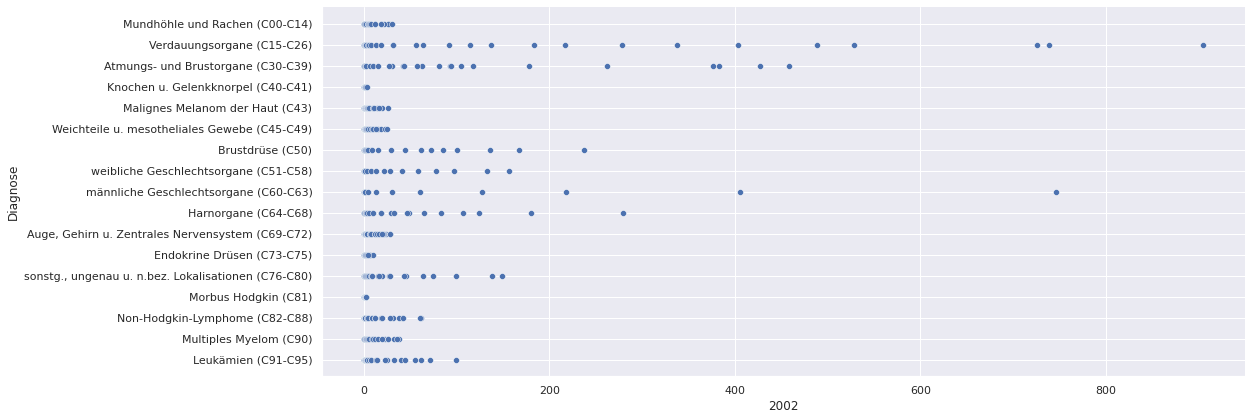

In [100]:
sns.relplot(x="2002",y="Diagnose", data=df, eight=6, aspect=11.7/4)

Schauen wir uns den Plot an, den wir erzeugt haben. So sehen wir, dass manche Krankheiten mit unterschiedlichem Alter sehr unterschiedlich häufig vorkommen und andere relativ unabhängig vom Alter selten vorkommen, aber nur im Vergleich zu allen Krankheiten in allen Altersgruppen. Naja also so richtig viel können wir also noch nicht sehen. Das sind zu viele Faktoren, um die Daten gut vergleichen zu können und schlecht gelabelt sind sie auch noch. Das wollen wir ändern und suchen uns einen Aspekt den wir genauer betrachten wollen. Wir erstellen uns ein DataFrame, welches nur diesen Aspekt speichert und alle anderen nicht!

In [137]:
# Aspekt: Verdauungsorgane bei Männern im Jahr 2002 über alle Altergruppen
dfplot1 = df.iloc[:,[0,1,2,6]]
dfplot1 = dfplot1[dfplot1.Diagnose == "Verdauungsorgane (C15-C26)"]
dfplot1 = dfplot1[dfplot1.Geschlecht == "männlich"]
dfplot1 = dfplot1.iloc[:,[0,3]]
dfplot1.head()

,Altersgruppe,2002
3,0 - 4,0.2
37,5 - 9,0.0
71,10 - 14,0.1
105,15 - 19,0.1
139,20 - 24,0.5


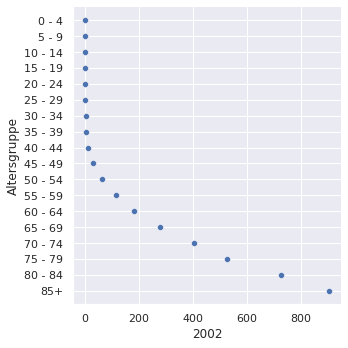

In [124]:
sns.relplot(x="2002",y="Altersgruppe", data=dfplot1)

Das sieht doch spannend aus! Wir sehen einen klaren Trend, dass die Wahrscheinlichkeit an Krebs an den Verdauungsorganen als Mann erkrankt zu sein im Jahr 2002 ab 40 Jahren stehtig ansteigt. Um diesen Zusammenhang bzw. Trend zu verdeutlichen, lassen wir uns die Daten noch als lineplot ausgeben: 

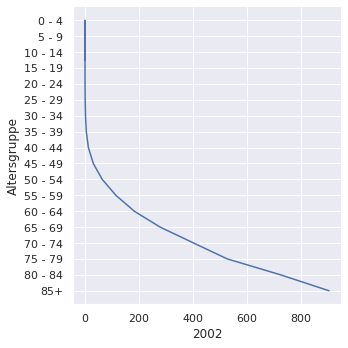

In [126]:
sns.relplot(x="2002",y="Altersgruppe", data=dfplot1, kind="line")

Natürlich ergibt es nicht immer Sinn, wenn man lineplot verwendet. Unsinnig wäre es zum Beispiel bei unserem ersten Plot:

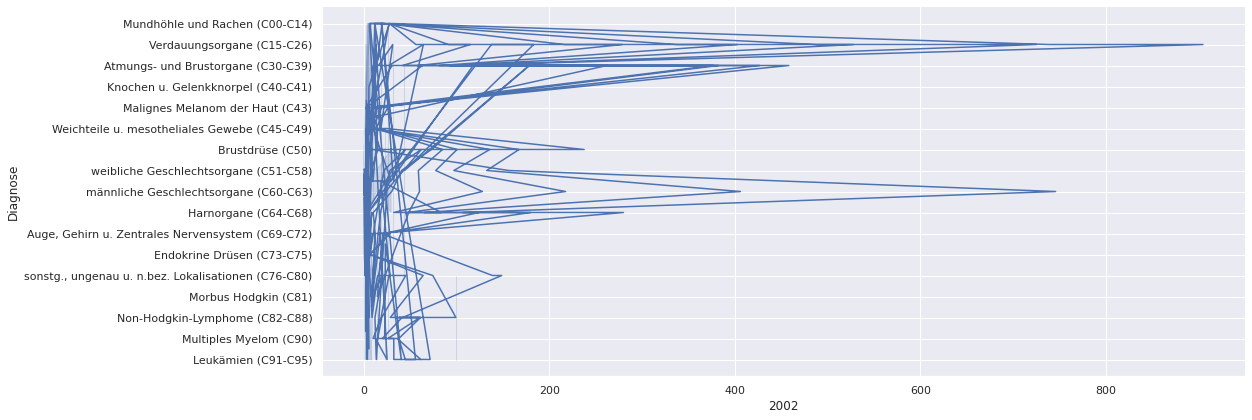

In [129]:
sns.relplot(x="2002",y="Diagnose", data=df, kind="line", sort=False, height=6, aspect=11.7/4)

Die Frage ist also, gibt es einen lineare Zusammenhang zwischen meinen Daten oder nicht. Wenn ja, kann ein linplot sinnvoll sein, falls nein dann nicht!

Interessant wird es, wenn wir zwei Gruppen in einem Plot haben, um diese zu vergleich. Wir werden die Daten von dfplot1 nehmen und diese mit den Frauen vergleichen. Dazu filtern wir zunächst wieder unsere Daten und reduzieren sie auf die wesentlichen Informationen und geben dieses Mal zuätzlich den Paramter `hue` an, der den Spaltennamen übergeben bekommt, nach dem die Gruppierung der Daten erfolgen soll. In unserem Fall das Geschlecht.

In [136]:
dfplot2 = df.iloc[:,[0,1,2,6]]
dfplot2 = dfplot2[dfplot2.Diagnose == "Verdauungsorgane (C15-C26)"]
dfplot2 = dfplot2.iloc[:,[0,2,3]]
dfplot2.head()

,Altersgruppe,Geschlecht,2002
2,0 - 4,weiblich,0.0
3,0 - 4,männlich,0.2
36,5 - 9,weiblich,0.1
37,5 - 9,männlich,0.0
70,10 - 14,weiblich,0.0


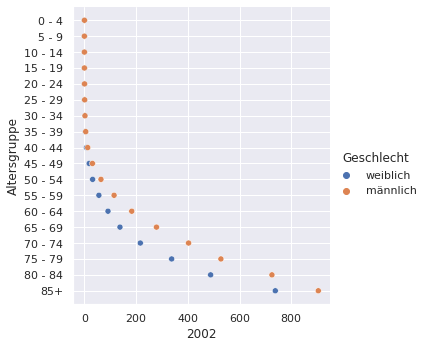

In [138]:
sns.relplot(x="2002",y="Altersgruppe", data=dfplot2, hue="Geschlecht")

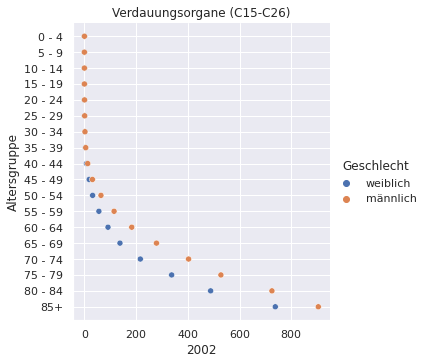

In [139]:
# Vollständigkeitshalber fügen wir noch den Titel hinzu, sodass eindeutig ist, um welche Daten es sich hier handelt und was zu sehen ist.
sns.relplot(x="2002",y="Altersgruppe", data=dfplot2, hue="Geschlecht").set(title="Verdauungsorgane (C15-C26)")

Ein Traum, so könnte man den Plot in z.B. einer Präsentation verwenden!

### 3.2 Visualisierung von Verteilungen von Daten

Zum plotten werwenden wir die Funktion `displot()` was für distribution modul steht, also um Verteilungen darzustellen. Das lässt sich besonders gut mit Barplots.

In [184]:
# Krebs im Alter: Alle Grebsarten zusammengefasst und gruppiert nach Alter und Geschlecht für 2010.
dfplot3 = df.iloc[:,[0,14]]
dfplot3 = dfplot3.groupby("Altersgruppe")["2010"].sum()
dfplot3 = pd.DataFrame(dfplot3)
dfplot3

,2010
Altersgruppe,
0 - 4,3.9
10 - 14,3.8
15 - 19,5.7
20 - 24,7.3
25 - 29,12.5
30 - 34,20.9
35 - 39,39.0
40 - 44,70.0
45 - 49,149.7


In [ ]:
sns.displot(dfplot3, x="Altersgruppe",y="2010", height=6, aspect=11.7/4)

### 3.3 Plotten mit kategorialen Daten

### 3.4 Visualisierung von Regressionsmoellen

In [226]:
dfplot4 = df.iloc[:,3:].T
dfplot4 = dfplot4.reset_index()
dfplot4

,index,0,1,2,3,4,5,6,7,8,...,602,603,604,605,606,607,608,609,610,611
0,1999,0.0,0.0,0.3,0.1,0.1,0.1,0.1,0.0,0.0,...,158.8,176.0,4.5,3.9,42.4,57.7,29.9,42.0,66.2,106.9
1,2000,0.1,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,...,144.2,165.5,2.1,4.1,42.0,61.1,22.5,41.8,58.5,109.8
2,2001,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,...,136.7,153.8,2.3,3.7,37.7,63.1,23.4,37.4,56.5,97.3
3,2002,0.1,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,...,138.6,148.6,2.5,2.8,41.8,60.3,25.9,36.0,61.3,99.2
4,2003,0.0,0.0,0.2,0.2,0.1,0.0,0.1,0.0,0.0,...,135.3,144.9,1.5,2.9,40.3,60.4,24.5,41.2,62.1,96.9
5,2004,0.0,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,...,129.2,137.3,1.4,3.0,40.6,70.4,25.0,37.9,59.1,103.8
6,2005,0.0,0.0,0.1,0.4,0.0,0.1,0.0,0.0,0.0,...,130.8,146.6,2.4,1.9,41.4,56.9,23.9,37.8,64.6,104.1
7,2006,0.0,0.0,0.2,0.1,0.0,0.1,0.1,0.0,0.0,...,126.9,133.3,2.2,2.3,41.9,57.8,24.1,33.4,58.1,93.8
8,2007,0.0,0.0,0.2,0.4,0.2,0.0,0.1,0.1,0.0,...,120.7,141.7,1.9,3.0,42.8,67.1,23.0,39.8,54.5,93.7
9,2008,0.0,0.1,0.1,0.2,0.1,0.1,0.0,0.0,0.0,...,118.4,129.6,1.9,3.7,44.9,67.6,23.0,41.5,59.1,90.9


### 4.5 Aufbau von strukturierten Multi-Plot-Gittern

### 4.6 Übung